## Step1: Read the dataset from: https://raw.githubusercontent.com/mwaskom/seaborndata/master/tips.csv
## and display the first five lines of the file.

In [105]:
import pandas as pd
from scipy import stats
import numpy as np
import os
import seaborn as sb
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
data = pd.read_csv(url)
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Step2: Compute the minimum, maximum, average and standard deviation of the first
## and second column.

In [184]:
listA = ['total_bill','tip']

for i in listA:
    print i
    print data[i].min()
    print data[i].max()
    print data[i].std()
    print data[i].mean()
    


total_bill
3.07
50.81
8.90241195486
19.785942623
tip
1.0
10.0
1.383638189
2.99827868852


## Step3: Plot the ‘total_bill’ column histogram.

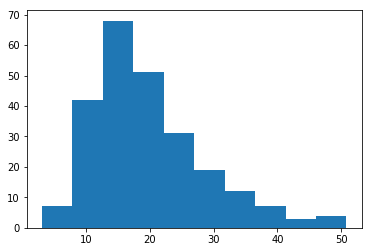

In [80]:
plt.hist(data.total_bill)
plt.show()

## Step4: Plot the ‘tip’ column histogram.

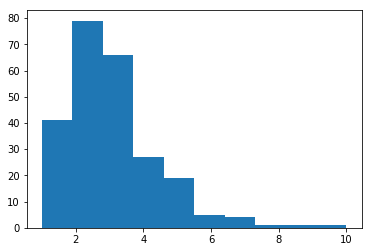

In [79]:
plt.hist(data.tip)
plt.show()

## Step5: Create a scatter plot presenting the relationship between total_bill and tip.
## What can you tell from this plot? Are they correlated?
## (Hint: you can use jointplot from seaborn.)

/Users/ernie/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ernie/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


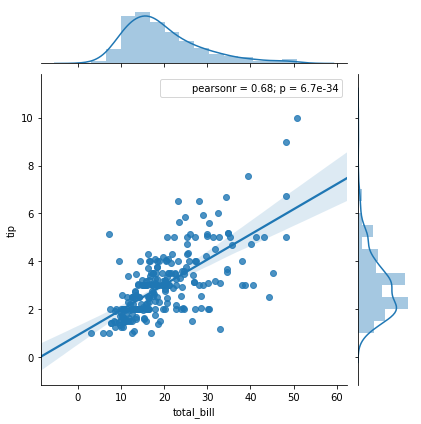

In [185]:
sb.jointplot(data.total_bill,data.tip,kind='reg')

## Step6: Create two histograms (must be side by side) of the tip value based for Dinner
## and Lunch.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ff8b0d0>,
      dtype=object)

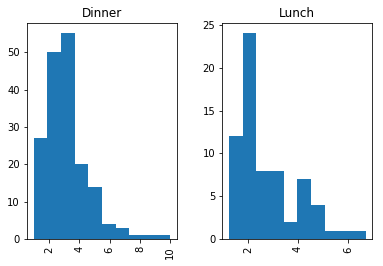

In [188]:
data.hist(column='tip',by='time')

## Step 7: Present the relationship between days and total_bill value.
## (Hint: try stripplot from seaborn.)

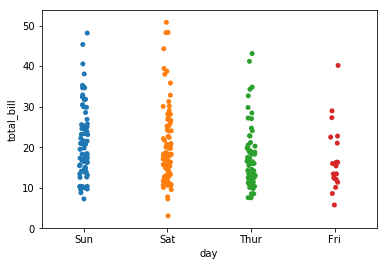

In [191]:
sb.stripplot(data.day,data.total_bill,jitter=0.05)

## Step8: . Create two scatterplots graphs (side by side), one for Male and another for
## Female, presenting the total_bill value and tip relationship, differing by
## smoker or non-smoker.
## (Hint: you can use FacetGrid from seaborn. E.g. fig = sb.FaceGrid(…), then
## fig.map(scatterplot…))

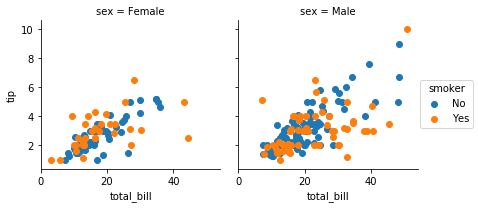

In [199]:
fig = sb.FacetGrid(data,col='sex', hue="smoker")
fig.map(plt.scatter, "total_bill", 'tip')
fig.add_legend()

## BONUS: Define a function that accepts data of total_bill and return a predicted
## tip.
## (Hint: find out the relationship between total_bill and tip.)

In [181]:
def tipPredictor(bill):
    info = stats.linregress(data.total_bill, data.tip)
    slope = info[0]
    intercept = info[1]
    predictedTip = bill * float(slope) + float(intercept)
    print "The predicted tip for $%s is: $%s" % (bill, predictedTip)

tipPredictor(823.98)

The predicted tip for $823.98 is: $87.4583714479


## BONUS: Create your own question and answer it using a graph:
## Create a graph that compares the total_bill to the meal and another graph to its right
## comparing total_bill to day

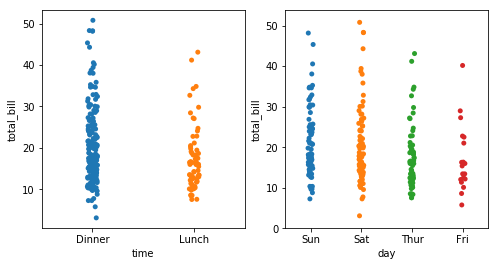

In [210]:
fig1=plt.figure(figsize=(8,4))
plt.subplot(1,2,2)
sb.stripplot(data.day,data.total_bill,jitter=0.05)
plt.subplot(1,2,1)
sb.stripplot(data.time,data.total_bill,jitter=0.05)

/Users/ernie/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


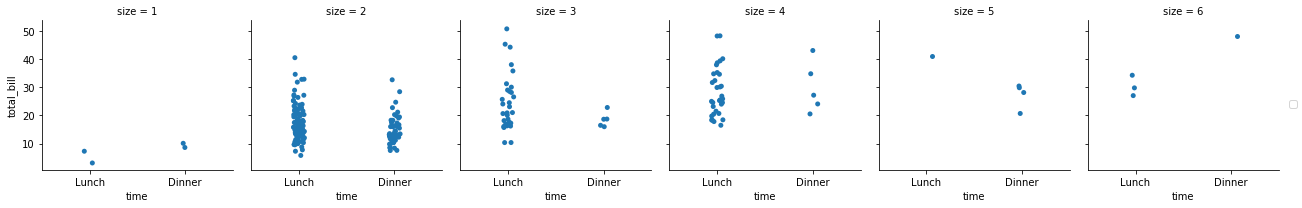

In [207]:
fig2 = sb.FacetGrid(data, col='size')
fig2.map(sb.stripplot,'time','total_bill', jitter=0.06)
fig2.add_legend()